In [16]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [17]:
df1 = pd.read_csv('short_oversampled_CICDDoS2019.csv')
df2 = df1.groupby([' Timestamp'])[' Flow Duration'].count()
df2 = pd.DataFrame(df2).reset_index()
df2.columns=[' Timestamp','BiFlowsCount']
df = df1.merge(df2, left_on=' Timestamp', right_on=' Timestamp')
df = df.sort_values(' Timestamp')
del df['target']
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label,BiFlowsCount
98143,305192,5,64,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,...,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,0,BENIGN,151
98130,305192,5,64,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,...,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,0,BENIGN,151
98131,305192,5,64,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,...,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,0,BENIGN,151
98132,305192,5,64,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,...,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,0,BENIGN,151
98133,305192,5,64,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,...,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,0,BENIGN,151


In [18]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']
del df['Unnamed: 0.1.1']

In [19]:
del df[' Inbound']

In [20]:
df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Label,BiFlowsCount
98143,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,34847273,9,8,...,32.908965,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,BENIGN,151
98130,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,34847273,9,8,...,32.908965,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,BENIGN,151
98131,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,34847273,9,8,...,32.908965,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,BENIGN,151
98132,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,34847273,9,8,...,32.908965,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,BENIGN,151
98133,172.217.3.110-192.168.50.6-80-56085-6,192.168.50.6,56085,172.217.3.110,80,6,2018-12-01 09:17:13.931484,34847273,9,8,...,32.908965,33030.0,32967.0,10004347.0,8980.692846,10014717.0,9999149.0,0,BENIGN,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769002,172.16.0.5-192.168.50.1-58456-40970-6,172.16.0.5,58456,192.168.50.1,40970,6,2018-12-01 13:34:27.399353,1,2,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,Syn,1
626544,172.16.0.5-192.168.50.1-43281-3482-6,172.16.0.5,43281,192.168.50.1,3482,6,2018-12-01 13:34:27.399459,1,2,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,Syn,1
828222,172.16.0.5-192.168.50.1-43286-10991-6,172.16.0.5,43286,192.168.50.1,10991,6,2018-12-01 13:34:27.401133,1,2,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,Syn,1
540722,172.16.0.5-192.168.50.1-43297-21257-6,172.16.0.5,43297,192.168.50.1,21257,6,2018-12-01 13:34:27.402247,1,2,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,Syn,1


In [21]:
features = ['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min', 'SimillarHTTP',
       'BiFlowsCount' ]

In [22]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Users\kdagi\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
def targetify(s):
    if s == 'BENIGN':
        return 0
    else:
        return 1

In [24]:
df['Target']=df[' Label'].apply(targetify)

In [25]:
 y = df['Target']

In [26]:
X = X.fillna(0)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(800000, 86) (800000,)
(200000, 86) (200000,)


In [28]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [29]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [30]:
importances = forest.feature_importances_

In [31]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [32]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 85: BiFlowsCount (0.206104)
2. feature 2:  Source Port (0.085634)
3. feature 4:  Destination Port (0.081159)
4. feature 54:  URG Flag Count (0.076324)
5. feature 53:  ACK Flag Count (0.055693)
6. feature 13:  Fwd Packet Length Min (0.050744)
7. feature 59:  Avg Fwd Segment Size (0.041604)
8. feature 42: Fwd Packets/s (0.038381)
9. feature 44:  Min Packet Length (0.038093)
10. feature 14:  Fwd Packet Length Mean (0.030551)
11. feature 21:  Flow Packets/s (0.028935)
12. feature 46:  Packet Length Mean (0.020655)
13. feature 55:  CWE Flag Count (0.020073)
14. feature 5:  Protocol (0.019807)
15. feature 58:  Average Packet Size (0.019581)
16. feature 57:  Down/Up Ratio (0.018782)
17. feature 20: Flow Bytes/s (0.017790)
18. feature 72: Init_Win_bytes_forward (0.014310)
19. feature 51:  RST Flag Count (0.011360)
20. feature 35:  Bwd IAT Min (0.008805)
21. feature 69:  Subflow Fwd Bytes (0.008149)
22. feature 73:  Init_Win_bytes_backward (0.008148)
23. feature 16: 

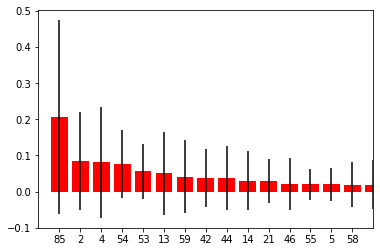

In [33]:
# Plot the top x feature importances of the forest
top_x = 15

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

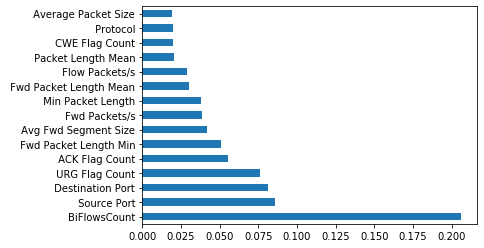

In [34]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")